## 항만 內 선박 대기 시간 예측을 위한 선박 항차 데이터 분석 AI 알고리즘 개발
https://dacon.io/competitions/official/236158/overview/description   
baseline: https://dacon.io/competitions/official/236158/codeshare/8822?page=1&dtype=recent   
reference: https://dacon.io/competitions/official/236158/codeshare/9222?page=1&dtype=recent   

In [2]:
import pandas as pd

train = pd.read_csv("ship_train.csv")
test = pd.read_csv("ship_test.csv")
train.shape, test.shape

((391939, 23), (220491, 22))

In [3]:
train.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


In [12]:
test.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE
0,TEST_000000,SG,GIW5,Container,1.826589,2020-06-18 11:58,K322654,50.0,18,117000,...,109000,340.0,KQMD74,Panama,0.37,1.63,27.1,1.587063,19,0.002615
1,TEST_000001,CN,WEY7,Cargo,25.399386,2021-05-26 22:20,E376681,10.0,13,3810,...,2560,80.0,LBYS27,Belize,-2.79,-2.33,14.2,2.663972,6,0.001028
2,TEST_000002,CN,NGG6,Container,111.079467,2019-12-16 0:09,F811111,20.0,26,10900,...,8440,140.0,EKFV15,Singapore,0.04,-4.91,9.3,3.255315,8,0.001743
3,TEST_000003,CA,FFM2,Bulk,9.175258,2015-11-16 5:30,A737561,30.0,9,55800,...,31500,190.0,MASW32,Panama,NaN,NaN,NaN,NaN,2,0.000182
4,TEST_000004,JP,QYY1,Container,0.000000,2018-10-24 1:11,A827175,30.0,19,39800,...,33000,220.0,SIEL54,Liberia,NaN,NaN,NaN,NaN,10,0.000552


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391939 entries, 0 to 391938
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ARI_CO              391939 non-null  object        
 1   ARI_PO              391939 non-null  object        
 2   SHIP_TYPE_CATEGORY  391939 non-null  object        
 3   DIST                391939 non-null  float64       
 4   ATA                 391939 non-null  datetime64[ns]
 5   ID                  391939 non-null  object        
 6   BREADTH             391938 non-null  float64       
 7   BUILT               391939 non-null  int64         
 8   DEADWEIGHT          391939 non-null  int64         
 9   DEPTH               391938 non-null  float64       
 10  DRAUGHT             391938 non-null  float64       
 11  GT                  391939 non-null  int64         
 12  LENGTH              391938 non-null  float64       
 13  SHIPMANAGER         391939 no

In [21]:
test.info() # target인 CI_HOUR만 없는 상태

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220491 entries, 0 to 220490
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ARI_CO              220491 non-null  int64         
 1   ARI_PO              220491 non-null  int64         
 2   SHIP_TYPE_CATEGORY  220491 non-null  int64         
 3   DIST                220491 non-null  float64       
 4   ATA                 220491 non-null  datetime64[ns]
 5   ID                  220491 non-null  int64         
 6   BREADTH             220491 non-null  float64       
 7   BUILT               220491 non-null  int64         
 8   DEADWEIGHT          220491 non-null  int64         
 9   DEPTH               220491 non-null  float64       
 10  DRAUGHT             220491 non-null  float64       
 11  GT                  220491 non-null  int64         
 12  LENGTH              220491 non-null  float64       
 13  SHIPMANAGER         220491 no

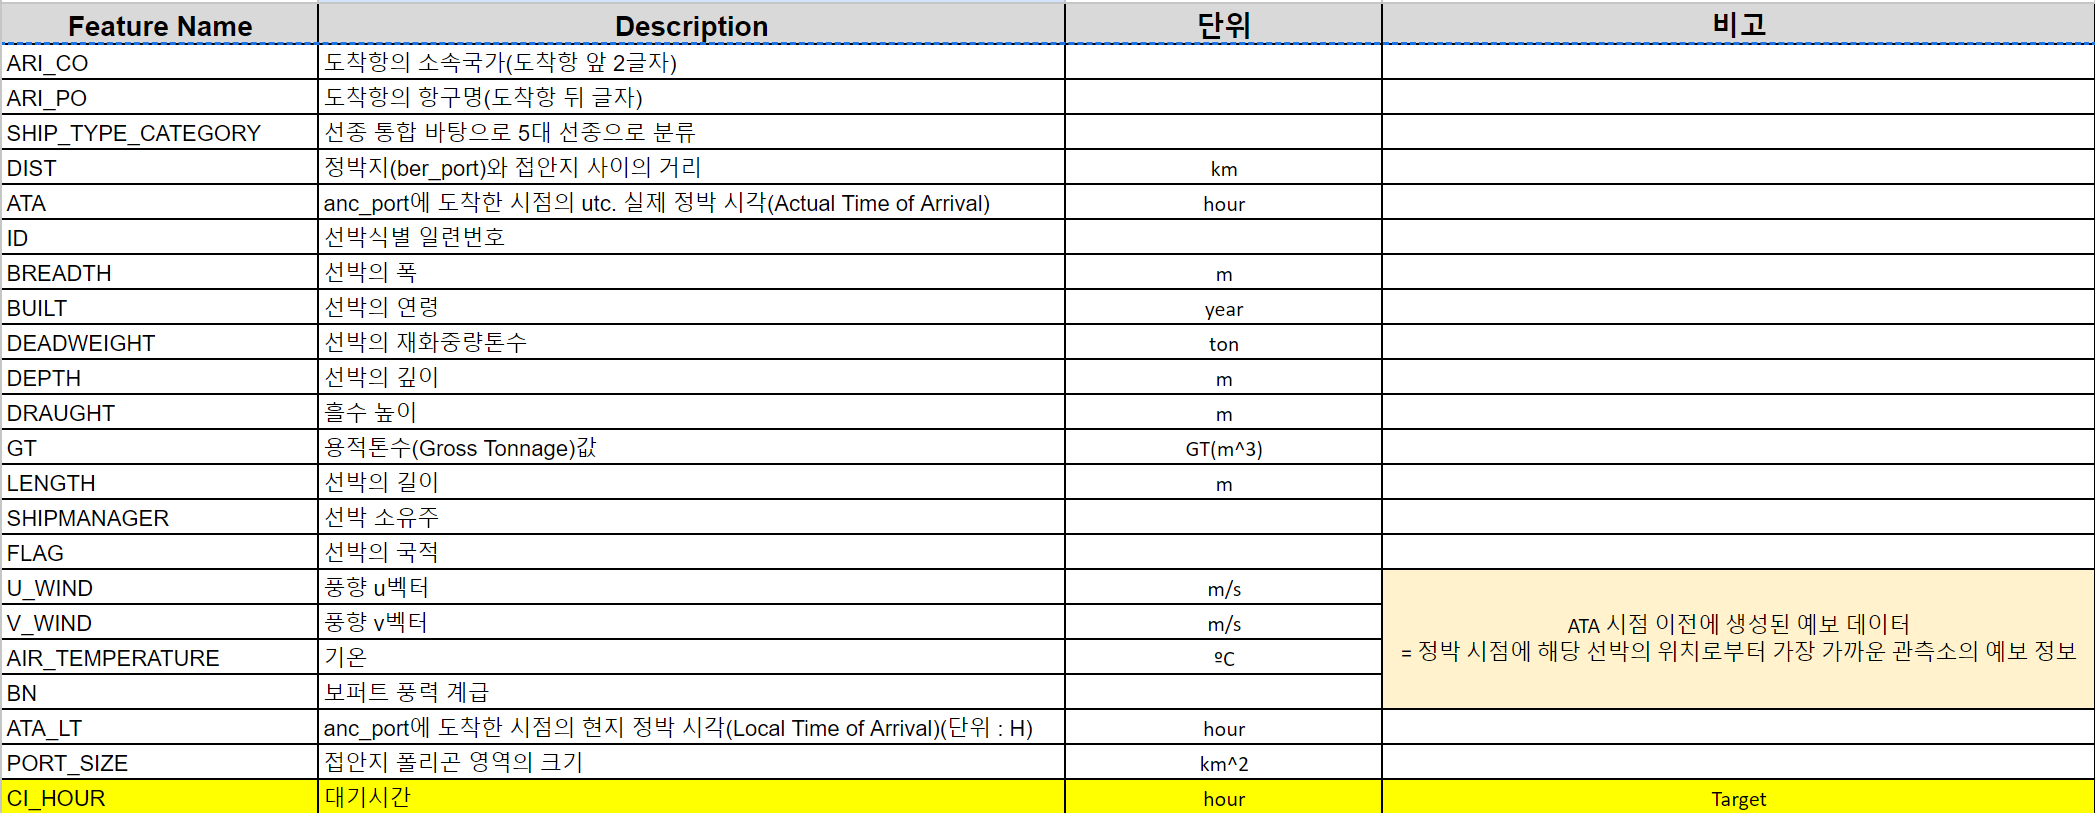

<Axes: >

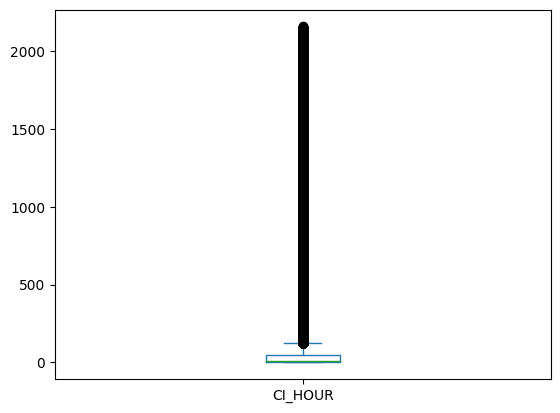

In [9]:
train.CI_HOUR.plot(kind='box')

In [11]:
len(train[train.CI_HOUR >=100]), len(train[train.CI_HOUR <100])

(58509, 333430)

In [14]:
# 모든 행에 unique한 SAMPLE_ID 제거
train = train.drop("SAMPLE_ID", axis=1)
test = test.drop("SAMPLE_ID", axis=1)

In [15]:
# UTC로 된 ATA를 datetime으로 변환
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tqdm import tqdm
import bisect
import numpy as np

# dtype이 Object인 데이터들 --> 범주형 데이터
categorical_features = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder() # 각 feature마다 라벨 인코더 객체 생성
    train[feature] = le.fit_transform(train[feature].astype(str)) # 변환해서 train[feature]에 저장
    le_classes_set = set(le.classes_)

    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s) # test에만 있던 것은 -1로 변환
    le_classes = le.classes_.tolist() # list로 만든 라벨 클래스
    bisect.insort_left(le_classes, '-1') # bisect으로 -1을 순서에 맞게 삽입
    le.classes_ = np.array(le_classes) # 바꾼 le_classes로 le 객체의 클래스를 변경
    test[feature] = le.transform(test[feature].astype(str)) # 해당 클래스로 test의 feature를 라벨 인코딩

    encoders[feature] = le # encoder 딕셔너리에 feature마다 생성한 라벨 인코딩 객체를 추가

Encoding features: 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]


In [18]:
encoders # 범주형 변수 6개에 대한 라벨 인코더 객체 딕셔너리

{'ARI_CO': LabelEncoder(),
 'ARI_PO': LabelEncoder(),
 'SHIP_TYPE_CATEGORY': LabelEncoder(),
 'ID': LabelEncoder(),
 'SHIPMANAGER': LabelEncoder(),
 'FLAG': LabelEncoder()}

In [19]:
train.isnull().sum()

ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

In [20]:
test.isnull().sum()

ARI_CO                    0
ARI_PO                    0
SHIP_TYPE_CATEGORY        0
DIST                      0
ATA                       0
ID                        0
BREADTH                   0
BUILT                     0
DEADWEIGHT                0
DEPTH                     0
DRAUGHT                   0
GT                        0
LENGTH                    0
SHIPMANAGER               0
FLAG                      0
U_WIND                91725
V_WIND                91725
AIR_TEMPERATURE       92246
BN                    91725
ATA_LT                    0
PORT_SIZE                 0
dtype: int64

In [22]:
# 결측치가 있는 U_WIND, V_WIND, AIR_TEMPERATURE, BN은 평균값으로 채우기
train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)

<ipython-input-22-d5e33a4b87a9>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train.fillna(train.mean(), inplace=True)
<ipython-input-22-d5e33a4b87a9>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.fillna(train.mean(), inplace=True)


In [23]:
train.isnull().sum() # 결측치 제거 확인

ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
dtype: int64

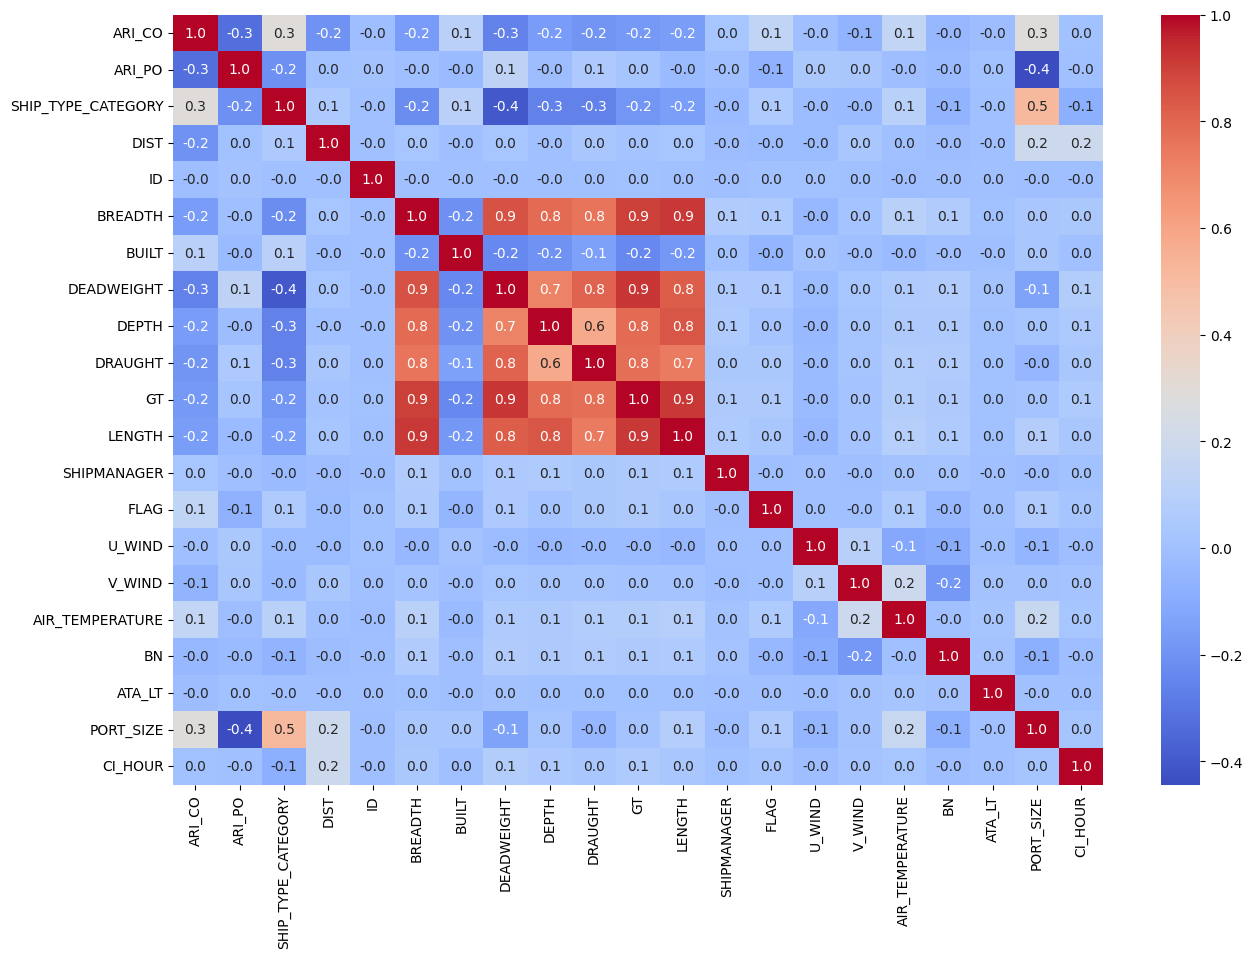

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(train.corr(numeric_only=True), cmap='coolwarm', fmt='.1f', annot=True)
plt.show()

In [30]:
# ATA를 분리해서 저장
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

train.drop(columns='ATA', inplace=True)
test.drop(columns='ATA', inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391939 entries, 0 to 391938
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ARI_CO              391939 non-null  int64  
 1   ARI_PO              391939 non-null  int64  
 2   SHIP_TYPE_CATEGORY  391939 non-null  int64  
 3   DIST                391939 non-null  float64
 4   ID                  391939 non-null  int64  
 5   BREADTH             391939 non-null  float64
 6   BUILT               391939 non-null  int64  
 7   DEADWEIGHT          391939 non-null  int64  
 8   DEPTH               391939 non-null  float64
 9   DRAUGHT             391939 non-null  float64
 10  GT                  391939 non-null  int64  
 11  LENGTH              391939 non-null  float64
 12  SHIPMANAGER         391939 non-null  int64  
 13  FLAG                391939 non-null  int64  
 14  U_WIND              391939 non-null  float64
 15  V_WIND              391939 non-nul

In [33]:
def get_season(month):
    if month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    elif month in [9, 10, 11]:
        return 4
    else:
        return 1
# 새로운 열 추가
train['SEASON'] = train['month'].apply(get_season) # 계절을 표시
test['SEASON'] = test['month'].apply(get_season)
train['WEEKEND'] = train['weekday'].apply(lambda x: 1 if x >= 5 else 0) # 주말이면 1, 주중이면 0
test['WEEKEND'] = test['weekday'].apply(lambda x: 1 if x >= 5 else 0)

train['WIND_INTENSITY'] = np.sqrt(train['U_WIND']**2 + train['V_WIND']**2)
test['WIND_INTENSITY'] = np.sqrt(test['U_WIND']**2 + test['V_WIND']**2)
train['U_WIND_SQUARE'] = train['U_WIND'] ** 2
test['U_WIND_SQUARE'] = test['U_WIND'] ** 2
train['V_WIND_SQUARE'] = train['V_WIND'] ** 2
test['V_WIND_SQUARE'] = test['V_WIND'] ** 2


train['VOLUME'] = train['BREADTH'] * train['LENGTH'] * train['DEPTH']
test['VOLUME'] = test['BREADTH'] * test['LENGTH'] * test['DEPTH']
train['WIND_DIRECTION'] = np.arctan2(train['V_WIND'], train['U_WIND']) * (180/np.pi)
test['WIND_DIRECTION'] = np.arctan2(test['V_WIND'], test['U_WIND']) * (180/np.pi)
train['WIND_DIRECTION'] = train['WIND_DIRECTION'].apply(lambda x: x+360 if x < 0 else x)
test['WIND_DIRECTION'] = test['WIND_DIRECTION'].apply(lambda x: x+360 if x < 0 else x)
train['WIND_SPEED_DIR'] = train['WIND_INTENSITY'] * train['WIND_DIRECTION']
test['WIND_SPEED_DIR'] = test['WIND_INTENSITY'] * test['WIND_DIRECTION']

In [35]:
train.columns

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ID', 'BREADTH',
       'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'PORT_SIZE', 'CI_HOUR', 'year', 'month', 'day', 'hour',
       'minute', 'weekday', 'SEASON', 'WEEKEND', 'WIND_INTENSITY',
       'U_WIND_SQUARE', 'V_WIND_SQUARE', 'VOLUME', 'WIND_DIRECTION',
       'WIND_SPEED_DIR'],
      dtype='object')

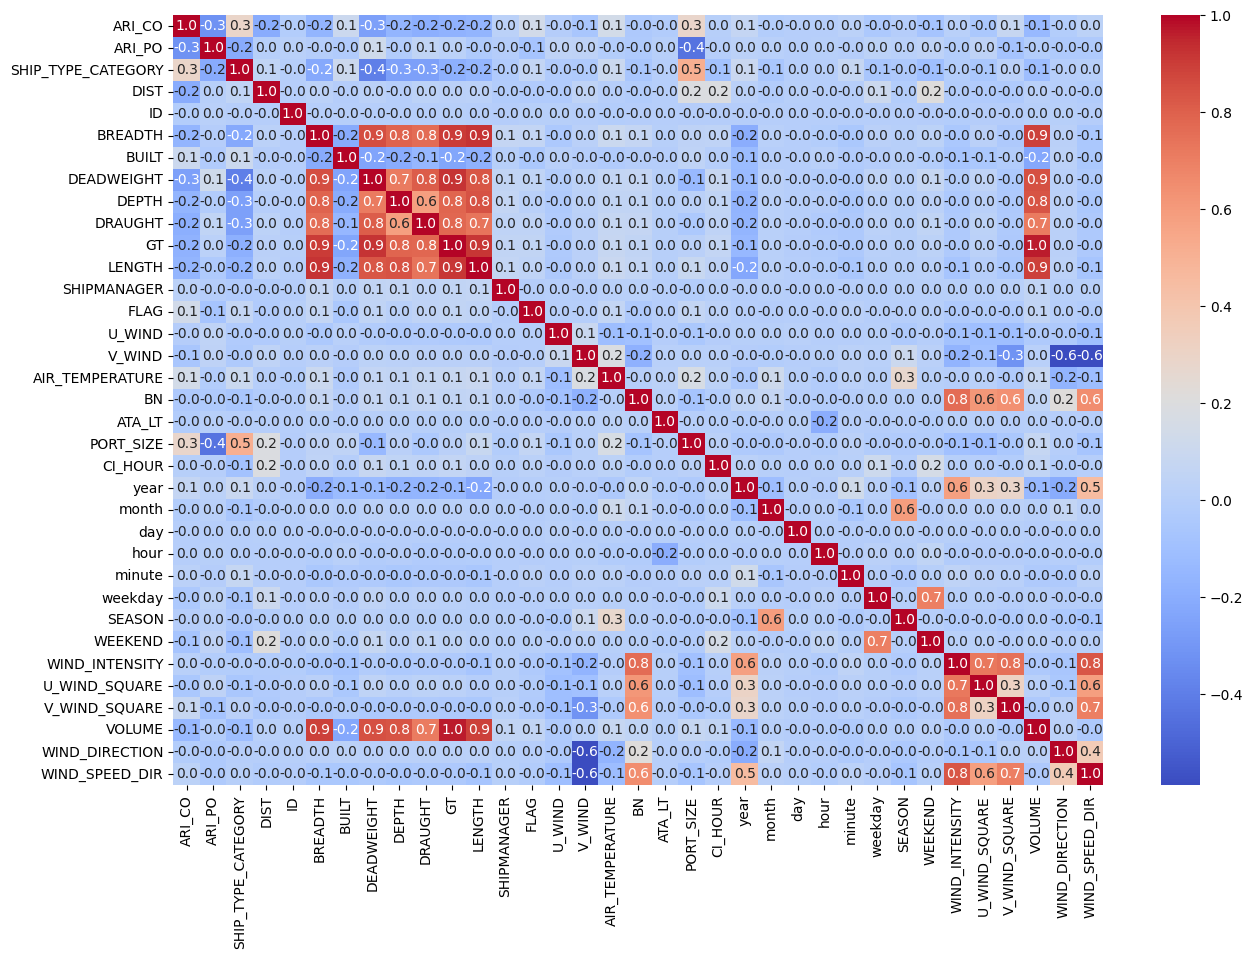

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(numeric_only=True), cmap='coolwarm', fmt='.1f', annot=True)
plt.show()

In [47]:
train.columns

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ID', 'BREADTH',
       'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'PORT_SIZE', 'CI_HOUR', 'year', 'month', 'day', 'hour',
       'minute', 'weekday', 'SEASON', 'WEEKEND', 'WIND_INTENSITY',
       'U_WIND_SQUARE', 'V_WIND_SQUARE', 'VOLUME', 'WIND_DIRECTION',
       'WIND_SPEED_DIR'],
      dtype='object')

In [51]:
X_train = train[['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ID', 'BREADTH',
       'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'PORT_SIZE', 'SEASON', 'WEEKEND', 'WIND_INTENSITY',
       'U_WIND_SQUARE', 'V_WIND_SQUARE']]
Y_train = train['CI_HOUR']
test = test[['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ID', 'BREADTH',
       'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'PORT_SIZE', 'SEASON', 'WEEKEND', 'WIND_INTENSITY',
       'U_WIND_SQUARE', 'V_WIND_SQUARE']]

In [52]:
#X_train = train.drop(columns='CI_HOUR')
#Y_train = train['CI_HOUR']

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(test)

X_train = pd.DataFrame(train_scaled, columns = X_train.columns)
test = pd.DataFrame(test_scaled, columns = test.columns)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [55]:
print("MSE:", mean_squared_error(y_pred, y_test))
print("MAE:", mean_absolute_error(y_pred, y_test))

MSE: 20451.436391073592
MAE: 55.50066568601646


모든 feature를 다 넣었을 때   
MSE: 19989.778874046286   
MAE: 55.18946170507504